In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

cars_df = pd.read_csv('data/Cars93.csv')

In [2]:
cars_df.drop(columns = [cars_df.columns[0]], inplace = True)

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [4]:
cars_df.shape

(93, 27)

In [5]:
cars_df.dropna(inplace = True)

In [6]:
cars_df.shape

(82, 27)

In [7]:
cars_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [8]:
cars_df.drop(columns = ['Make'], inplace = True)
cars_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [9]:
cars_df.columns = [_.lower().replace(".","_") for _ in cars_df.columns]
cars_df['cylinders'] = cars_df['cylinders'].astype('int64')


In [10]:
cars_df.select_dtypes('object')

,manufacturer,model,type,airbags,drivetrain,man_trans_avail,origin
0,Acura,Integra,Small,None,Front,Yes,non-USA
1,Acura,Legend,Midsize,Driver & Passenger,Front,Yes,non-USA
2,Audi,90,Compact,Driver only,Front,Yes,non-USA
3,Audi,100,Midsize,Driver & Passenger,Front,Yes,non-USA
4,BMW,535i,Midsize,Driver only,Rear,Yes,non-USA
...,...,...,...,...,...,...,...
87,Volkswagen,Fox,Small,None,Front,Yes,non-USA
89,Volkswagen,Passat,Compact,None,Front,Yes,non-USA
90,Volkswagen,Corrado,Sporty,None,Front,Yes,non-USA
91,Volvo,240,Compact,Driver only,Rear,Yes,non-USA


In [11]:
dummied_cars_df = pd.get_dummies(cars_df, columns = [_ for _ in cars_df.select_dtypes('object').columns], drop_first=True)

In [12]:
dummied_cars_df

,min_price,price,max_price,mpg_city,mpg_highway,cylinders,enginesize,horsepower,rpm,rev_per_mile,...,type_Large,type_Midsize,type_Small,type_Sporty,airbags_Driver only,airbags_None,drivetrain_Front,drivetrain_Rear,man_trans_avail_Yes,origin_non-USA
0,12.9,15.9,18.8,25,31,4,1.8,140,6300,2890,...,0,0,1,0,0,1,1,0,1,1
1,29.2,33.9,38.7,18,25,6,3.2,200,5500,2335,...,0,1,0,0,0,0,1,0,1,1
2,25.9,29.1,32.3,20,26,6,2.8,172,5500,2280,...,0,0,0,0,1,0,1,0,1,1
3,30.8,37.7,44.6,19,26,6,2.8,172,5500,2535,...,0,1,0,0,0,0,1,0,1,1
4,23.7,30.0,36.2,22,30,4,3.5,208,5700,2545,...,0,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,8.7,9.1,9.5,25,33,4,1.8,81,5500,2550,...,0,0,1,0,0,1,1,0,1,1
89,17.6,20.0,22.4,21,30,4,2.0,134,5800,2685,...,0,0,0,0,0,1,1,0,1,1
90,22.9,23.3,23.7,18,25,6,2.8,178,5800,2385,...,0,0,0,1,0,1,1,0,1,1
91,21.8,22.7,23.5,21,28,4,2.3,114,5400,2215,...,0,0,0,0,1,0,0,1,1,1


In [14]:
target = ['mpg_highway']
not_target = [_ for _ in dummied_cars_df.columns if _ not in target]

X = dummied_cars_df.loc[:, not_target]
y = dummied_cars_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

prediction = mlr.predict(X_test)

cod = mlr.score(X_test, y_test)
intercept = mlr.intercept_[0]
coef_list = mlr.coef_

print(f'Coefficient of Determination: {cod}\nIntercept: {intercept}\nNumber of Coefficients: {len(coef_list[0])}')

Coefficient of Determination: 0.8955064169199725
Intercept: 0.6657411155473412
Number of Coefficients: 140


In [15]:
y_test['prediction'] = prediction

C:\Users\Work\AppData\Local\Temp/ipykernel_9100/1353184780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['prediction'] = prediction


In [16]:
y_test

,mpg_highway,prediction
31,30,29.421964
2,26,26.332500
71,30,27.392123
48,24,24.255573
8,27,27.190860
47,22,23.636044
45,34,31.766216
13,28,27.873633
90,25,27.206962
60,26,23.455595


In [17]:
y_test['residuals'] = y_test['mpg_highway'] - y_test['prediction']

C:\Users\Work\AppData\Local\Temp/ipykernel_9100/1109425516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['residuals'] = y_test['mpg_highway'] - y_test['prediction']


In [18]:
y_test

,mpg_highway,prediction,residuals
31,30,29.421964,0.578036
2,26,26.332500,-0.332500
71,30,27.392123,2.607877
48,24,24.255573,-0.255573
8,27,27.190860,-0.190860
47,22,23.636044,-1.636044
45,34,31.766216,2.233784
13,28,27.873633,0.126367
90,25,27.206962,-2.206962
60,26,23.455595,2.544405


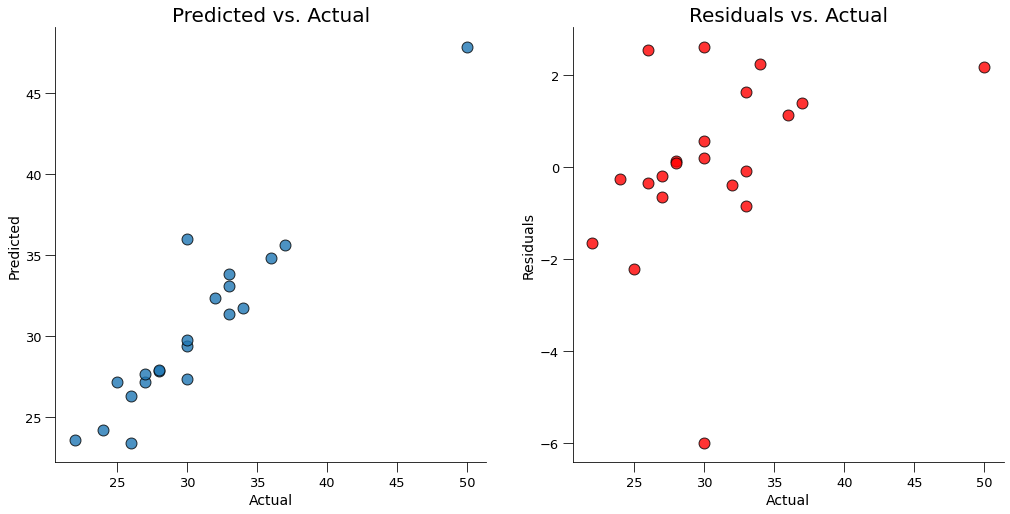

In [19]:
# x = cars_df['Weight'].to_numpy()
# y = cars_df['MPG.highway'].to_numpy()

# slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
# line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13


fig, axs = plt.subplots(1,2, figsize = (17,8))
axs[0].set_title("Predicted vs. Actual", fontsize = 20)
axs[1].set_title("Residuals vs. Actual", fontsize = 20)
sns.scatterplot(data = y_test,
                     x = 'mpg_highway',
                     y = 'prediction',
                     s = 120,
                     alpha = .8, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False, 
                     ax = axs[0])

sns.scatterplot(data = y_test,
                     x = 'mpg_highway',
                     y = 'residuals',
                     s = 120,
                     alpha = .8, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False, 
                     color = 'red',
                     ax = axs[1])

axs[0].set_xlabel('Actual', fontsize = 14)
axs[0].set_ylabel('Predicted', fontsize = 14)
axs[0].tick_params(size = 10)
axs[1].tick_params(size = 10)
axs[1].set_xlabel('Actual', fontsize = 14)
axs[1].set_ylabel('Residuals', fontsize = 14)

sns.despine()
plt.show()

In [20]:
formula_string = f'y = {intercept}'
for i,c in enumerate(coef_list[0]):
    if c >= 0:
        sign = "+"
    else: 
        sign = '-'
    formula_string = formula_string + f' {sign} {abs(c)}*x{i+1}'
print(formula_string)

y = 0.6657411155473412 + 0.08762910933890332*x1 - 0.00951004655619847*x2 - 0.042371798779206396*x3 + 0.8266474745420253*x4 - 0.9171234565186717*x5 - 0.09356393879606456*x6 + 0.01802244238563494*x7 + 0.0002066269021221978*x8 - 0.0012771622081925171*x9 - 0.036997344836210005*x10 - 0.6286619392245374*x11 + 0.045644879922062453*x12 + 0.11146597263711677*x13 + 0.1060994941287538*x14 - 0.033775807939786406*x15 - 0.17500066971906325*x16 + 0.4920835639601393*x17 - 0.00352431228086858*x18 + 0.5168994405107159*x19 + 0.7634145711634874*x20 - 0.06972890951556099*x21 + 0.8944423102652915*x22 + 1.2905768872405152*x23 + 0.3995661958726334*x24 - 0.8093550086105177*x25 - 0.6304789625278173*x26 - 0.590578092388237*x27 - 0.4376554765012047*x28 + 0.39573949866422586*x29 - 0.2745798783101846*x30 + 0.21445741512464678*x31 + 8.493959176614219e-05*x32 - 0.27269610560692176*x33 - 0.3376112753758954*x34 + 0.25780520378109384*x35 + 0.5560458107876104*x36 - 1.6072313273206729*x37 - 0.545441794842244*x38 - 0.99427